In [2]:
import postprocess as pp
import plots as plots


# ATk stability of a discrete bar


We study the stability of the following structure,
which features non-trivial stability properties
such as:
    -
    -
    -

The stability analysis is done according to ...


Several stability notions:

A state $y_t$ is stable if:

GS) $$
    E(y_t)\leq E(z), \quad \forall z \in A(y_t)
    $$

LS) 
$\exists \bar h: $
$$
E(y_t)\leq E(y_t + z), \quad \forall z \in .., ||z||\leq h
$$

$$\text{Find } (x, \lambda)\in X\times \mathbb R: \quad
K^+_0 \ni x \perp y := Ax - \lambda B x \in K^*$$
where 
$K^+_0$  is a closed convex cone and $K^*$ its polar set (dual).


In [2]:
!pwd

/Users/kumiori/Documents/WIP/m4s-MEC647/mec647/playground/nb


In [26]:
experiment = '../../test/output/test_cone'
params, data, signature = pp.load_data(experiment)


In [23]:
signature

'0e4222aae85c49d06616b57b1f6841da'

In [14]:
params

{'geometry': {'Lx': 1.0,
  'Ly': 0.1,
  'geom_type': 'discrete-damageable',
  'geometric_dimension': 2,
  'lc': 0.02},
 'loading': {'max': 1.001, 'min': 0, 'steps': 10},
 'model': {'N': 3,
  'ell': 0.1,
  'k': 4,
  'k_res': 0.0001,
  'model_dimension': 1,
  'model_type': '1D',
  'mu': 1,
  'w1': 1},
 'solvers': {'damage': {'prefix': 'damage',
   'snes': {'ksp_type': 'preonly',
    'pc_factor_mat_solver_type': 'mumps',
    'pc_type': 'lu',
    'snes_atol': 1e-05,
    'snes_linesearch_type': 'basic',
    'snes_max_it': 50,
    'snes_monitor': '',
    'snes_rtol': 1e-05,
    'snes_type': 'vinewtonrsls'},
   'tao': {'ksp_rtol': '1e-6',
    'pc_type': 'lu',
    'tao_catol': 0.0,
    'tao_crtol': 0.0,
    'tao_gatol': 1e-08,
    'tao_gpcg_maxpgits': 50,
    'tao_grtol': 1e-08,
    'tao_gttol': 1e-08,
    'tao_ls_ftol': '1e-5',
    'tao_ls_gtol': '1e-5',
    'tao_ls_rtol': '1e-5',
    'tao_ls_stepmax': '1e6',
    'tao_ls_stepmin': '1e-8',
    'tao_max_it': 100,
    'tao_monitor': '',
    'tao

In [8]:
!ls '../../test/output/test_cone'

discrete-damageable-data.json    discrete-damageable_energies.pdf
discrete-damageable.h5           discrete-damageable_it_load.pdf
discrete-damageable.xdmf


In [44]:
import numpy as np

w1 = params["model"]["w1"]
k = params["model"]["k"]
mu = params["model"]["mu"]

tc = np.sqrt(8*w1/(mu*k))
sigmac = np.sqrt(2*w1*mu/k)

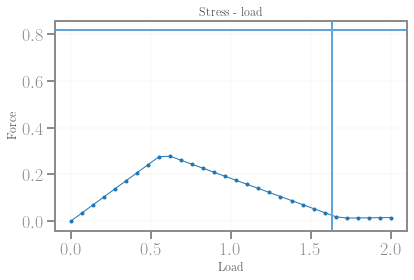

In [45]:
fig, ax = plots.plot_force_displacement(data)
ax.axvline(tc)
ax.axhline(sigmac)

NameError: name 'gcp' is not defined

In [34]:
print(tc)

1.632993161855452


### Cone stability

Want to solve:
the cone-constrained eigenvalue problem:
$$\text{Find } (x, \lambda)\in X\times \mathbb R: \quad
K^+_0 \ni x \perp y := Ax - \lambda B x \in K^*$$

generating a sequence $z_t$ laying in the compact set $K_{\phi}$ and a bounded sequence $\lambda_t \in \mathbb R$, and a sequence $y_t$ of residual vectors (laying in the dual cone) 

Algorithm (SPA)

- the initial guess is given by the soution of the discrete-stability aka the rate problem (on a vector space)

- Compute:
$$
\lambda_t = \frac{x A x}{x B x}
\qquad\text{ and }
y_t= Ax - \lambda B x$$ 

- Select (any) scaling factor $s_t > 0$ and project
$$
v_t = \Pi_K (x_t - s_t y_t)
$$

- Normalise
$$
x_{t+1} = v_t / \phi(v_t)
$$

Remarks: if for some $t$ one has $y_t=0$ then stop
(because $x_{t+1}=x_t$) and $x_t$ is a classical solution.
Here we use $\phi(x)=||x||_{L^2}$. I think in our case $B=Id$